# Introduction

This series of notebooks describes the `sxs` python package, which provides an interface to the data produced by the Simulating eXtreme Spacetimes collaboration.  All that data is hosted on [Zenodo](https://zenodo.org/communities/sxs) and [CaltechDATA](https://data.caltech.edu/).  Each simulation gets its own DOI and its own web page — like [this one](https://doi.org/10.5281/zenodo.1213436), for example.  But you want an easier way to get the data than clicking on links.  This package will do that for you.

The documentation is [here](https://sxs.readthedocs.io/en/main/).  The github page is [here](https://github.com/sxs-collaboration/sxs/).  Please feel free to open issues to report problems, or pull requests to fix them.

# Pythonic Preliminaries

* ***Don't*** use your system python.  Installing packages to it might screw up how your OS works.
* ***Don't*** use `sudo` when doing anything involving python.
* ***Do*** use an environment manager:
  * [Anaconda](https://www.anaconda.com/products/individual) is best for scientific python
  * [Virtualenv](https://virtualenv.pypa.io/en/latest/) is slightly simpler, but much less capable
  * [Pip](https://pip.pypa.io/en/stable/) is a useful tool, but is not an environment manager; don't rely on it alone
  * Pipenv is only suitable for web development, not scientific python; don't use this at all

The `sxs` package requires python 3.8 or greater, and a bunch of other packages that should be automatically installed along with it.

The simplest way to install this package is to install anaconda (from the link above) and then install `sxs` like this:

```python
conda install -c conda-forge sxs
```

But if you have your own environment set up in some other way you could also do

```python
python -m pip install sxs
```

If you want a more complete set of tools, you could also do something like

```python
conda install -c conda-forge sxs-ecosystem
```

or

```python
python -m pip install sxs[ecosystem]
```

This installs nice goodies like [Matplotlib](https://matplotlib.org/) for plotting and [Jupyter](https://jupyter.org/) for running interactive notebooks like this one yourself.  On non-Windows systems, this also installs some other useful packages from the SXS collaboration, like [`scri`](https://github.com/moble/scri).

# Configuration and caching preliminaries

By default, downloading data is turned off, which means you will be responsible for obtaining the data yourself.  However, an easier option is to let `sxs` download the data for you.

Of course, downloading data files every time you load them will use a lot of bandwidth.  You'll probably want to set up automatic caching of files to disk.

And finally you may want to automatically get the newest simulation for a given set of physical parameters whenever possible.

The `sxs` package can be configured to do all of these things for you.  To start with, this package will try to store configuration settings somewhere.  Find where that is with this:

In [1]:
import sxs

sxs.sxs_directory("config")  # Probably returns some path in your home directory

PosixPath('/oscar/home/ccvws98/.ood_config/sxs')

Now, let's try to write our defaults to the config file:

In [2]:
sxs.write_config(download=True, cache=True, auto_supersede=True)

You can check that this worked by reading your config file:

In [3]:
sxs.read_config()

{'download': True, 'cache': True, 'auto_supersede': True}

You can also find the directory used to cache the data:

In [4]:
sxs.sxs_directory("cache")  # Probably returns some path in your home directory

PosixPath('/oscar/home/ccvws98/.cache/sxs')

Now that that's all set up, you should be able to use the `sxs` package efficiently.

# User interface: Proof of concept

The goal of this package is to enable users to do something like this:

```python
sxs_bbh_1234 = sxs.load("SXS:BBH:1234")
h = sxs_bbh_1234.h
```

The first line will

  1. download the catalog of SXS `Simulations` with relevant metadata, if necessary, and cache it to disk if desired
  2. find the metadata for the simulation with the given ID
  3. check that the simulation has not been deprecated (if so, it will advise you of what to do)
  4. decide on the version and `Lev` to use — defaulting to the most recent of each
  5. download the list of files for that simulation, if necessary, and cache it to disk if desired
  6. return a `Simulation` object with the metadata for "SXS:BBH:0123"

However, no data will be loaded (or downloaded if necessary) until requested.  The second line requests
the strain data `h` for this simulation.  This line will

  1. download the `h` data, if necessary, and cache it to disk if desired
  2. load the data as a `WaveformModes` object, providing a uniform interface to the data
  3. cache the data in the `Simulation` object, so that it is not reloaded if requested again

Just to prove that this is possible, here's a simple example taking you from zero to plot in four lines of code:

  0%|                                                                | 0/1701058 [00:00<?, ?it/s]

  0%|                                                                | 0/4036285 [00:00<?, ?it/s]

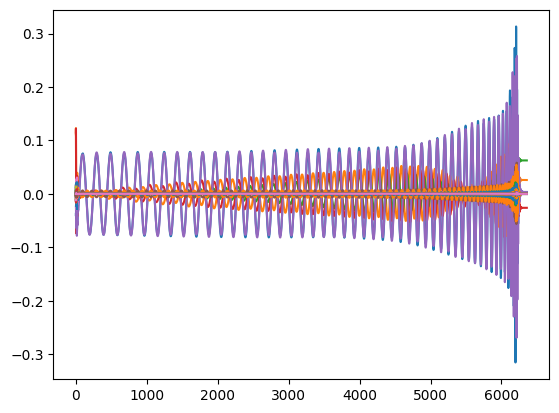

In [5]:
import matplotlib.pyplot as plt
import sxs

sxs_bbh_1234 = sxs.load("SXS:BBH:1234")
plt.plot(sxs_bbh_1234.h.t, sxs_bbh_1234.h.data.real);

(If this failed for you, it's probably because you don't already have the data, and you haven't set up the sensible defaults in the previous section.  Review that advice to see how to set up those defaults, or pass `download=True` to the `sxs.load` function to download just this once.)

This example loads the metadata into the `sxs_bbh_1234` object.  Then, as soon as `sxs_bbh_1234.h` is accessed, it downloads and loads the waveform.  We extract the time data with `sxs_bbh_1234.h.t`, and the real part of the complex data with `sxs_bbh_1234.h.data.real`.  We will get into much more detail about this in the following notebooks.

# The notebooks

It is probably best to go through these notebooks in order:

  1. [The `Simulations` interface and `Metadata`](/tutorials/01-Simulations_and_Metadata)
  2. [The `Simulation` interface](/tutorials/02-Simulation)
  3. [Data describing `Horizons`](/tutorials/03-Horizons)
  4. [Introduction to `WaveformModes` objects](/tutorials/04-Waveforms)